# Tutorial basico Keras
#### Importar packages

In [2]:
#!pip install tensorflow==2.12.0
#!pip install keras==2.12.0

In [1]:
import tensorflow as tf # keras utiliza el motor tensorflow como base -> mas sencillo keras
from sklearn.model_selection import GridSearchCV
import keras
tf.__version__

'2.14.0'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# !pip install tensorflow==2.12.0
# !pip install keras==2.12.0

In [3]:
keras.__version__
# 2.12

'2.14.0'


<div>
<img src="attachment:image-2.png" width="800"/>
</div>

In [8]:
from keras.datasets import mnist
# from keras.utils.np_utils import to_categorical 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [9]:
train_labels[105] # Y

1

In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
train_images[10].shape

(28, 28)

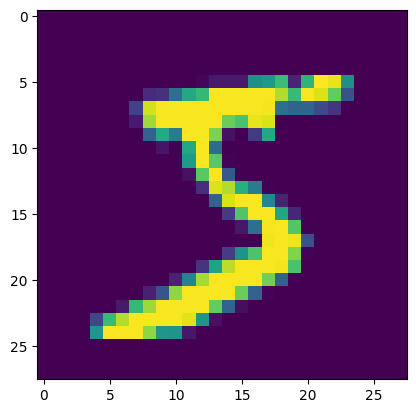

In [12]:
# escojo una imagen
digit = train_images[0]
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(digit)
plt.show()

In [13]:
train_images[45]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [14]:
train_images[45][14,14]

243

In [15]:
28*28

784

In [16]:
train_images = train_images.reshape((60000, 784)) 
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [17]:
train_images.shape

(60000, 784)

Cambiamos a formato categoricas el target

In [19]:
from keras.utils import to_categorical

In [20]:
# from keras.utils.np_utils import to_categorical # multiclasificacion
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels,10)


In [21]:
train_labels[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [22]:
train_images.shape

(60000, 784)

## Importamos modulos de keras


In [23]:
from keras import models
from keras import layers

Este layers.Dense se puede ver como una función que recive como input 784 y te devuelve 512 valores

La palabra 'relu' es la funcion de activación que se le aplica a estos 512 valors output

In [24]:
network = models.Sequential() # clf = LogisticRegression()
layer1 = layers.Dense(512, activation='relu', input_shape=(784,)) # 28*28 = 784(vector input)
network.add(layer1)
layer_out = layers.Dense(10, activation='softmax') # muticlasificación
network.add(layer_out)


In [25]:
network


In [26]:
(784+1)*512

401920

In [27]:
(512+1)*10

5130

In [28]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# asi inicializamos una red neuronal
network = models.Sequential()
# layers es la unidad basica de las redes neuronales
# Dense es que son densos, estan conectados todos con todos

# este layer solo aceptara un input de la forma (28*28,)
# este layer devolverá un tensor/vector que serà de una dimension de 512
# tenemos 400 neuronas
layer1=layers.Dense(400, activation='relu', input_shape=(784,))# 28*28 = 784(vector input)
network.add(layer1)
layer2=layers.Dense(100, activation='relu')# 28*28 = 784(vector input)
network.add(layer2)
# netwrok.add(layers.Dense(512, activation='relu'))

# Aqui hacemos un softmax de 10 para devolver 10 probabilidades
# no ponemos un input_shape, todo està hecho para ser compatible con el layer incluido anteriormente
layer_out=layers.Dense(10, activation='softmax')
# layer_out=layers.Dense(1, activation='sigmoid')
# layer_out=layers.Dense(1, activation='relu') # 'linear'
network.add(layer_out)

In [30]:
network

In [31]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 400)               314000    
                                                                 
 dense_3 (Dense)             (None, 100)               40100     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 355110 (1.35 MB)
Trainable params: 355110 (1.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
785*400

314000

In [28]:
# (784 pixels (input) + 1 bias/intercept)* 400 (neruons)
101*10

1010

In [29]:
# (512 activations+ 1 bias)*100 neurons
401*100

40100

Para entrenar el modelo necesitamos unos pasos mas:
* Loss function
* Un Optimizador
* Metricas

In [33]:
# necesitamos "compilar" el modelo añadiendo la funcion de coste y el optimizador
network.compile(optimizer='rmsprop', # el tipo de gradient descent
                loss='categorical_crossentropy', # una funcion de error (depende del tipo de problema)
                metrics=['accuracy']) # metricas que quiero que me saquen

Cambiamos las dimensiones para que esten en forma de vector

Ajustamos la red neuronal, ponemos el numero de Epochs y el batch_size

In [34]:
history = network.fit(train_images, train_labels, epochs=10, batch_size=100, validation_data=(test_images, test_labels))
# 100 -> 600 iteraciones en cada epoch

Epoch 1/10
600/600 [==============================] - 10s 15ms/step - loss: 0.2302 - accuracy: 0.9309 - val_loss: 0.1247 - val_accuracy: 0.9609
Epoch 2/10
600/600 [==============================] - 7s 11ms/step - loss: 0.0907 - accuracy: 0.9723 - val_loss: 0.0738 - val_accuracy: 0.9764
Epoch 3/10
600/600 [==============================] - 6s 10ms/step - loss: 0.0586 - accuracy: 0.9821 - val_loss: 0.0691 - val_accuracy: 0.9790
Epoch 4/10
600/600 [==============================] - 6s 10ms/step - loss: 0.0422 - accuracy: 0.9866 - val_loss: 0.0763 - val_accuracy: 0.9785
Epoch 5/10
600/600 [==============================] - 6s 10ms/step - loss: 0.0314 - accuracy: 0.9899 - val_loss: 0.0697 - val_accuracy: 0.9794
Epoch 6/10
600/600 [==============================] - 6s 10ms/step - loss: 0.0232 - accuracy: 0.9926 - val_loss: 0.0703 - val_accuracy: 0.9805
Epoch 7/10
600/600 [==============================] - 6s 10ms/step - loss: 0.0182 - accuracy: 0.9942 - val_loss: 0.0782 - val_accuracy: 0.980

In [35]:
# el modelo al cual hemos llamado "history" tiene un atributo que es history,
# que contiene la información de la performance por cada epoch
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [36]:
history.history['val_loss']

[0.12470129132270813,
 0.0738350972533226,
 0.06908822059631348,
 0.07626912742853165,
 0.06966248899698257,
 0.07028008252382278,
 0.07816317677497864,
 0.07473830878734589,
 0.07861893624067307,
 0.08045149594545364]

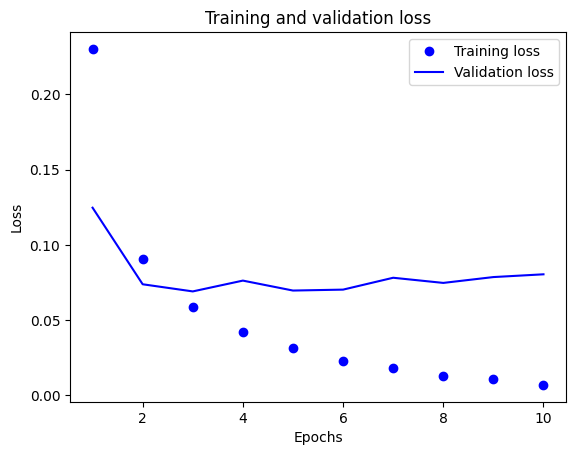

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

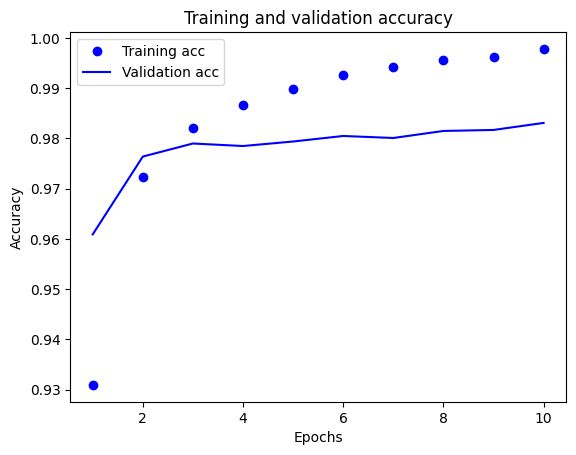

In [38]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Para evaluar las metricas tenemos que hacer referencia al objeto creado "network" y a la funcion evaluate

Parecido a los objetos de sciki-learn y su función score

In [39]:
test_loss, test_acc = network.evaluate(test_images, test_labels) # score 
print('test_acc:', test_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.0805 - accuracy: 0.9831
test_acc: 0.9830999970436096


In [40]:
y_hat=network.predict(test_images)

313/313 [==============================] - 2s 5ms/step


In [41]:
test_labels[131]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [42]:
y_hat[131].round(3)

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# Nuevo modelo Regularización y dropout

In [43]:
from keras import regularizers
model = models.Sequential()

model.add(layers.Dense(400, kernel_regularizer=regularizers.l2(0.0001), activation='relu', input_shape=(784,)))
model.add(layers.Dropout(0.5)) # tira las neuronas con un 0.5 de probabilidad
model.add(layers.Dense(100, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [44]:
# necesitamos "compilar" el modelo añadiendo la funcion de coste y el optimizador
model.compile(optimizer='rmsprop', # el tipo de gradient descent
                loss='categorical_crossentropy', # una funcion de error (depende del tipo de problema)
                metrics=['accuracy']) # metricas que quiero que me saquen

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 400)               314000    
                                                                 
 dropout (Dropout)           (None, 400)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               40100     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 355110 (1.35 MB)
Trainable params: 355110 (1.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
from keras import losses
from keras import metrics
from keras import optimizers
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, momentum=0.1),
              loss=losses.categorical_crossentropy,
              metrics=[metrics.categorical_accuracy])

In [47]:
history=model.fit(train_images, train_labels, epochs=5, batch_size=200, validation_data=(test_images, test_labels))

Epoch 1/5
300/300 [==============================] - 8s 20ms/step - loss: 0.4233 - categorical_accuracy: 0.8932 - val_loss: 0.2171 - val_categorical_accuracy: 0.9526
Epoch 2/5
300/300 [==============================] - 6s 21ms/step - loss: 0.2342 - categorical_accuracy: 0.9495 - val_loss: 0.1654 - val_categorical_accuracy: 0.9682
Epoch 3/5
300/300 [==============================] - 6s 21ms/step - loss: 0.1913 - categorical_accuracy: 0.9608 - val_loss: 0.1554 - val_categorical_accuracy: 0.9707
Epoch 4/5
300/300 [==============================] - 6s 21ms/step - loss: 0.1689 - categorical_accuracy: 0.9663 - val_loss: 0.1419 - val_categorical_accuracy: 0.9756
Epoch 5/5
300/300 [==============================] - 8s 26ms/step - loss: 0.1569 - categorical_accuracy: 0.9692 - val_loss: 0.1300 - val_categorical_accuracy: 0.9770


In [48]:
model.evaluate(train_images, train_labels)

1875/1875 [==============================] - 10s 5ms/step - loss: 0.1047 - categorical_accuracy: 0.9849


[0.10473643243312836, 0.9848999977111816]

In [49]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.1300 - categorical_accuracy: 0.9770


[0.12997642159461975, 0.9769999980926514]